#Optimizing the classifier hyperparameters

In [28]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
import sklearn as skl
import sklearn.metrics
import sklearn.learning_curve
import sklearn.ensemble
import sklearn.dummy
import sklearn.grid_search
import sklearn.feature_extraction
import sklearn.feature_extraction.text
import numpy as np

import sys
sys.path = sys.path + ['..']
import get_airbnb_data
import db
import learning
import imp
imp.reload(learning)
from learning import *

In [20]:
engine = db.create_root_engine()
rawtable = pd.io.sql.read_sql_table('listings', engine, index_col='id')
Xtr, Xte, ytr, yte = get_training_test_set(rawtable, make_features=make_features4, 
                                               categorize_rating=categorize_rating2)

In [21]:
Xtr

,amenity0,amenity1,amenity2,amenity3,amenity4,amenity5,amenity6,amenity7,amenity8,amenity9,...,city_in_description,by_in_description,one_in_description,at_in_description,day_in_description,west_in_description,nDescriptionMisspellings,homeValueIndex,medianListPricePerSqFt,medianSingleFamilyHomeValue
id,,,,,,,,,,,,,,,,,,,,,
air1215070,1,1,1,0,0,0,0,0,1,0,...,2,1,0,2,1,0,11,0,0,0
air2747721,1,1,1,0,1,0,1,0,1,0,...,1,0,0,1,0,0,1,290100,315,0
air4547704,1,0,1,0,1,0,0,0,1,0,...,4,0,0,0,0,0,5,290900,351,396800
air4448343,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,4,814200,627,779400
air3148268,1,0,0,0,1,0,0,0,0,1,...,0,0,0,2,0,0,6,0,0,0
air4184027,1,0,0,0,1,0,0,0,1,0,...,0,2,0,1,0,0,5,1040900,753,2073200
air361119,1,1,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,3,130300,0,0
air2874695,1,0,1,0,0,0,0,0,0,0,...,1,0,0,2,1,0,10,916400,0,0
air126982,1,0,1,0,1,0,0,0,1,0,...,1,2,1,0,1,0,5,941600,894,1780900


In [11]:
Xtr.fillna(0)

,amenity0,amenity1,amenity2,amenity3,amenity4,amenity5,amenity6,amenity7,amenity8,amenity9,...,city_in_description,by_in_description,one_in_description,at_in_description,day_in_description,west_in_description,nDescriptionMisspellings,homeValueIndex,medianListPricePerSqFt,medianSingleFamilyHomeValue
id,,,,,,,,,,,,,,,,,,,,,
air2585167,1,0,0,0,1,0,0,0,1,0,...,2,1,4,1,0,0,13,1372200,982,2265400
air3311654,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,1229800,663,1407400
air3705944,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,621400,604,1481000
air1940833,1,0,1,0,1,0,0,0,1,0,...,0,3,3,0,1,0,4,424900,286,462800
air879378,1,0,0,0,1,0,0,0,0,0,...,2,1,0,2,0,0,4,0,0,0
air3860810,1,0,0,0,1,0,0,0,1,1,...,0,0,5,1,0,0,13,0,0,0
air575758,1,0,1,0,1,0,0,0,0,0,...,1,1,0,0,1,0,10,0,0,0
air4446241,1,0,0,0,1,0,0,0,1,1,...,1,3,0,3,0,0,13,1056500,568,1249300
air789549,1,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,4,0,0,0


In [8]:
clf_dummy = get_dummy_clf()

In [15]:
scaler = skl.preprocessing.StandardScaler()
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=1000, criterion='gini', 
                                              max_features='auto', max_depth=None, # Can experiment with this to regularize
                                              n_jobs=4, class_weight='auto') # try 'subsample' too?
clf5 = skl.pipeline.Pipeline([
        ('scaler', scaler), ('clf', clf)])
param_grid={'clf__n_estimators': [100, 1000], 'clf__max_features': [10, 100, 300]}
gridclf5 = skl.grid_search.GridSearchCV(clf5, param_grid=param_grid, scoring=class_weighted_accuracy_score, 
                                            n_jobs=1, cv=3, verbose=1)
gridclf5.fit(Xtr, ytr)

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 41.6min finished


Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'clf__max_features': [10, 100, 300], 'clf__n_estimators': [100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=<function class_weighted_accuracy_score at 0x7fd1c53b2c80>,
       verbose=1)

In [16]:
gridclf5.grid_scores_

[mean: 0.50997, std: 0.00198, params: {'clf__max_features': 10, 'clf__n_estimators': 100},
 mean: 0.51021, std: 0.00166, params: {'clf__max_features': 10, 'clf__n_estimators': 1000},
 mean: 0.51254, std: 0.00148, params: {'clf__max_features': 100, 'clf__n_estimators': 100},
 mean: 0.51311, std: 0.00276, params: {'clf__max_features': 100, 'clf__n_estimators': 1000},
 mean: 0.51464, std: 0.00228, params: {'clf__max_features': 300, 'clf__n_estimators': 100},
 mean: 0.51426, std: 0.00238, params: {'clf__max_features': 300, 'clf__n_estimators': 1000}]

In [17]:
scaler = skl.preprocessing.StandardScaler()
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, criterion='gini', 
                                              max_features='auto', max_depth=None, # Can experiment with this to regularize
                                              n_jobs=4, class_weight='auto') # try 'subsample' too?
clf5 = skl.pipeline.Pipeline([
        ('scaler', scaler), ('clf', clf)])
param_grid={'clf__max_features': [300, 400, 490], 'clf__criterion': ['gini', 'entropy']}
gridclf5 = skl.grid_search.GridSearchCV(clf5, param_grid=param_grid, scoring=class_weighted_accuracy_score, 
                                            n_jobs=1, cv=3, verbose=1)
gridclf5.fit(Xtr, ytr)

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 24.3min finished


Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'clf__max_features': [300, 400, 490], 'clf__criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=<function class_weighted_accuracy_score at 0x7fd1c53b2c80>,
       verbose=1)

In [18]:
gridclf5.grid_scores_

[mean: 0.51399, std: 0.00292, params: {'clf__max_features': 300, 'clf__criterion': 'gini'},
 mean: 0.51571, std: 0.00212, params: {'clf__max_features': 400, 'clf__criterion': 'gini'},
 mean: 0.51559, std: 0.00323, params: {'clf__max_features': 490, 'clf__criterion': 'gini'},
 mean: 0.51403, std: 0.00256, params: {'clf__max_features': 300, 'clf__criterion': 'entropy'},
 mean: 0.51451, std: 0.00149, params: {'clf__max_features': 400, 'clf__criterion': 'entropy'},
 mean: 0.51502, std: 0.00261, params: {'clf__max_features': 490, 'clf__criterion': 'entropy'}]

In [22]:
scaler = skl.preprocessing.StandardScaler()
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, criterion='gini', 
                                              max_features='auto', max_depth=None, # Can experiment with this to regularize
                                              n_jobs=4, class_weight='auto') # try 'subsample' too?
clf5 = skl.pipeline.Pipeline([
        ('scaler', scaler), ('clf', clf)])
param_grid={'clf__max_features': [350, 450], 'clf__class_weight': ['auto', 'subsample']}
gridclf5 = skl.grid_search.GridSearchCV(clf5, param_grid=param_grid, scoring=class_weighted_accuracy_score, 
                                            n_jobs=1, cv=3, verbose=1)
gridclf5.fit(Xtr, ytr)

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 15.5min finished


Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'clf__class_weight': ['auto', 'subsample'], 'clf__max_features': [350, 450]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=<function class_weighted_accuracy_score at 0x7fd1ca283840>,
       verbose=1)

In [23]:
gridclf5.grid_scores_

[mean: 0.51536, std: 0.00271, params: {'clf__class_weight': 'auto', 'clf__max_features': 350},
 mean: 0.51576, std: 0.00260, params: {'clf__class_weight': 'auto', 'clf__max_features': 450},
 mean: 0.51507, std: 0.00287, params: {'clf__class_weight': 'subsample', 'clf__max_features': 350},
 mean: 0.51593, std: 0.00365, params: {'clf__class_weight': 'subsample', 'clf__max_features': 450}]

In [24]:
scaler = skl.preprocessing.StandardScaler()
clf = sklearn.ensemble.ExtraTreesClassifier(n_estimators=100, criterion='gini', 
                                              max_features='auto', max_depth=None, # Can experiment with this to regularize
                                              n_jobs=4, class_weight='auto') # try 'subsample' too?
clf5 = skl.pipeline.Pipeline([
        ('scaler', scaler), ('clf', clf)])
param_grid={'clf__max_features': [100, 300, 400, 490]}
gridclf5 = skl.grid_search.GridSearchCV(clf5, param_grid=param_grid, scoring=class_weighted_accuracy_score, 
                                            n_jobs=1, cv=3, verbose=1)
gridclf5.fit(Xtr, ytr)

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   31.4s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 18.0min finished


Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', ExtraTreesClassifier(bootstrap=False, class_weight='auto', criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'clf__max_features': [100, 300, 400, 490]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=<function class_weighted_accuracy_score at 0x7fd1ca283840>,
       verbose=1)

In [25]:
gridclf5.grid_scores_

[mean: 0.51749, std: 0.00136, params: {'clf__max_features': 100},
 mean: 0.51996, std: 0.00182, params: {'clf__max_features': 300},
 mean: 0.52162, std: 0.00279, params: {'clf__max_features': 400},
 mean: 0.52400, std: 0.00192, params: {'clf__max_features': 490}]

This seems close to optimal for random forest type (might still squeeze a bit more):

In [26]:
scaler = skl.preprocessing.StandardScaler()
clf = sklearn.ensemble.ExtraTreesClassifier(n_estimators=100, criterion='gini', 
                                              max_features=490, max_depth=None, # Can experiment with this to regularize
                                              n_jobs=4, class_weight='auto') # try 'subsample' too?
clf5 = skl.pipeline.Pipeline([
        ('scaler', scaler), ('clf', clf)])

<module 'matplotlib.pyplot' from '/home/ibuder/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py'>

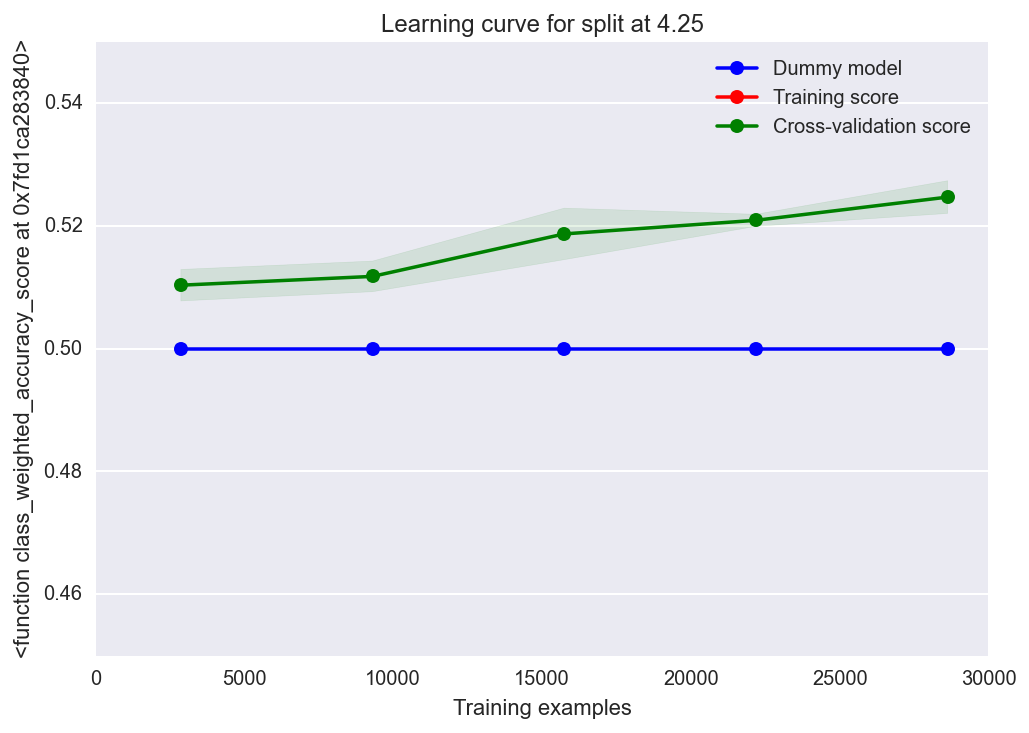

In [27]:
plot_learning_curve(clf5, "Learning curve for split at 4.25", Xtr, ytr, dummy=clf_dummy, 
                    scoring=class_weighted_accuracy_score, ylim=[0.45, 0.55], n_jobs=1)

In [29]:
engine = db.create_root_engine()
rawtable = pd.io.sql.read_sql_table('listings', engine, index_col='id')
Xtr2, Xte2, ytr2, yte2 = get_training_test_set(rawtable, make_features=make_features4, 
                                               categorize_rating=categorize_rating4)

In [30]:
scaler = skl.preprocessing.StandardScaler()
clf = sklearn.ensemble.ExtraTreesClassifier(n_estimators=100, criterion='gini', 
                                              max_features='auto', max_depth=None, # Can experiment with this to regularize
                                              n_jobs=4, class_weight='auto') # try 'subsample' too?
clf5 = skl.pipeline.Pipeline([
        ('scaler', scaler), ('clf', clf)])
param_grid={'clf__max_features': [100, 300, 490, 497]}
gridclf5 = skl.grid_search.GridSearchCV(clf5, param_grid=param_grid, scoring=class_weighted_accuracy_score, 
                                            n_jobs=1, cv=3, verbose=1)
gridclf5.fit(Xtr2, ytr2)

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   36.1s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 22.4min finished


Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', ExtraTreesClassifier(bootstrap=False, class_weight='auto', criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'clf__max_features': [100, 300, 490, 497]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=<function class_weighted_accuracy_score at 0x7fd1bd671bf8>,
       verbose=1)

In [31]:
gridclf5.grid_scores_

[mean: 0.38888, std: 0.00195, params: {'clf__max_features': 100},
 mean: 0.39275, std: 0.00375, params: {'clf__max_features': 300},
 mean: 0.39596, std: 0.00254, params: {'clf__max_features': 490},
 mean: 0.39592, std: 0.00437, params: {'clf__max_features': 497}]

In [32]:
scaler = skl.preprocessing.StandardScaler()
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, criterion='gini', 
                                              max_features='auto', max_depth=None, # Can experiment with this to regularize
                                              n_jobs=4, class_weight='auto') # try 'subsample' too?
clf5 = skl.pipeline.Pipeline([
        ('scaler', scaler), ('clf', clf)])
param_grid={'clf__max_features': [100, 300, 490, 497]}
gridclf5 = skl.grid_search.GridSearchCV(clf5, param_grid=param_grid, scoring=class_weighted_accuracy_score, 
                                            n_jobs=1, cv=3, verbose=1)
gridclf5.fit(Xtr2, ytr2)

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   29.5s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 17.4min finished


Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'clf__max_features': [100, 300, 490, 497]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=<function class_weighted_accuracy_score at 0x7fd1bd671bf8>,
       verbose=1)

In [33]:
gridclf5.grid_scores_

[mean: 0.38822, std: 0.00453, params: {'clf__max_features': 100},
 mean: 0.39487, std: 0.00375, params: {'clf__max_features': 300},
 mean: 0.39435, std: 0.00441, params: {'clf__max_features': 490},
 mean: 0.39710, std: 0.00335, params: {'clf__max_features': 497}]